In [1]:
import pm4py
import pandas as pd
import numpy as np
import Levenshtein as lv
import collections as collections
import matplotlib.pyplot as plt
import math
import bezier
import itertools
import time
import scipy

In [2]:
alphabet = ["a","b","c"]

In [3]:
def random_trace(alphabet, length):
    return "".join([ alphabet[i] for i in np.random.choice(len(alphabet), length) ])

In [4]:
random_trace(alphabet, np.random.randint(1, 6))

'b'

In [5]:
def random_log(max_trace_length, max_log_size): 
    base_log = [ random_trace(alphabet, np.random.randint(1, max_trace_length)) for _ in range(np.random.randint(1, max_log_size)) ]
    return collections.Counter(base_log)

In [6]:
def random_log_x(trace_length, log_size): 
    base_log = [ random_trace(alphabet, trace_length) for _ in range(log_size) ]
    return collections.Counter(base_log)

In [7]:
def log_len(l):
    return np.sum(list(l.values()))

In [8]:
def log_to_list(l):
    return list(itertools.chain(*[ [t] * o for (t, o) in l.most_common() ]))

In [9]:
log_to_list(random_log(4,4))

['b', 'b']

In [10]:
def Indel(l, m, sl, sm):
    
    Is_sum = 0
    for (lt_s, lt_o) in l.items():
        for (gte_s, gte_o) in m.items():
            Is_sum += lv.ratio(lt_s, gte_s) * lt_o * gte_o
    
    return Is_sum / (sl * sm)

In [11]:
def Hamming(l, m, sl, sm):
    
    hd_sum = 0
    for (lt_s, lt_o) in l.items():
        for (gte_s, gte_o) in m.items():
            hd_sum += lv.hamming(lt_s, gte_s) * lt_o * gte_o
    
    return hd_sum / (sl * sm)

In [12]:
def levenshteinDistance(A, B):
    N, M = len(A), len(B)
    # Create an array of size NxM
    dp = [[0 for i in range(M + 1)] for j in range(N + 1)]

    # Base Case: When N = 0
    for j in range(M + 1):
        dp[0][j] = j
    # Base Case: When M = 0
    for i in range(N + 1):
        dp[i][0] = i
    # Transitions
    for i in range(1, N + 1):
        for j in range(1, M + 1):
            if A[i - 1] == B[j - 1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = 1 + min(
                    dp[i-1][j], # Insertion
                    dp[i][j-1], # Deletion
                    dp[i-1][j-1] # Replacement
                )

    return dp[N][M]

In [13]:
def normalizedLevenshteinDistance(A, B):
    return levenshteinDistance(A, B) / max(len(A), len(B))

In [14]:
def Levenshtein(l, m, sl, sm):
    
    Is_sum = 0
    for (lt_s, lt_o) in l.items():
        for (gte_s, gte_o) in m.items():
            Is_sum += levenshteinDistance(list(lt_s), list(gte_s)) * lt_o * gte_o
    
    return Is_sum / (sl * sm)

In [15]:
def Levenshtein_min(l, m):
    
    min = 0
    for (lt_s, lt_o) in l.items():
        for (gte_s, gte_o) in m.items():
            d = levenshteinDistance(list(lt_s), list(gte_s)) * lt_o * gte_o
            if d < min:
                min = d
    
    return min

In [16]:
N = 10000

a = random_trace(alphabet, 5)
b = random_trace(alphabet, 0)

d_ab = normalizedLevenshteinDistance(a,b)

for i in range(N):
    c = random_trace(alphabet, 5)
    d_ac = normalizedLevenshteinDistance(a,c)
    d_bc = normalizedLevenshteinDistance(b,c)

    if d_ab > d_ac + d_bc:
        print("! triangle inequation violated !")
        print(f"a: {a}") 
        print(f"b: {b}") 
        print(f"c: {c}") 


In [17]:
N = 10000

a = random_log(5, 5)
b = random_log(5, 5)

d_ab = Levenshtein(a,b, log_len(a), log_len(b))

for i in range(N):
    c = random_log(5, 5)
    d_ac = Levenshtein(a,c, log_len(a), log_len(c))
    d_bc = Levenshtein(b,c, log_len(b), log_len(c))

    if d_ab > d_ac + d_bc:
        print("! triangle inequation violated !")
        print(f"a: {a}") 
        print(f"b: {b}") 
        print(f"c: {c}")

In [18]:
while True:    
    A = random_log(6, 6)
    B = random_log(6, 6)

    # A = collections.Counter(["a", "aab", "aa"])
    # B = collections.Counter(["a", "aaab"])

    Levenshtein_ab = Levenshtein(A, B, log_len(A), log_len(B)) 
    Levenshtein_aa = Levenshtein(A, A, log_len(A), log_len(A))
    Levenshtein_bb = Levenshtein(B, B, log_len(B), log_len(B))

    if (Levenshtein_ab < Levenshtein_aa or Levenshtein_ab < Levenshtein_bb):
        
        print(f'A = {A}')
        print(f'B = {B}')

        print(f'log_len(A) = {log_len(A)}')
        print(f'log_len(B) = {log_len(B)}')

        print(f'Levenshtein(A,B) = {Levenshtein_ab}')
        print(f'Levenshtein(A,A) = {Levenshtein_aa}')
        print(f'Levenshtein(B,B) = {Levenshtein_bb}')

        # print(f'Levenshtein(A,A) * Levenshtein(B,B) = {Levenshtein_aa * Levenshtein_bb}')
        
        break

A = Counter({'cbb': 1, 'b': 1})
B = Counter({'c': 1, 'accbb': 1, 'ca': 1, 'cbcbc': 1, 'ab': 1})
log_len(A) = 2
log_len(B) = 5
Levenshtein(A,B) = 2.2
Levenshtein(A,A) = 1.0
Levenshtein(B,B) = 2.48


In [19]:
sum = 0
for a, x in A.items():
    for b, y  in B.items():
        print(f'Indel({a}({x}), {b}({y})) = {lv.ratio(a, b)}({x * y})')
        sum = sum + (lv.ratio(a, b) * x * y) 

print(f'sum = {sum}')

Indel(cbb(1), c(1)) = 0.5(1)
Indel(cbb(1), accbb(1)) = 0.75(1)
Indel(cbb(1), ca(1)) = 0.4(1)
Indel(cbb(1), cbcbc(1)) = 0.75(1)
Indel(cbb(1), ab(1)) = 0.4(1)
Indel(b(1), c(1)) = 0.0(1)
Indel(b(1), accbb(1)) = 0.33333333333333337(1)
Indel(b(1), ca(1)) = 0.0(1)
Indel(b(1), cbcbc(1)) = 0.33333333333333337(1)
Indel(b(1), ab(1)) = 0.6666666666666667(1)
sum = 4.133333333333334


In [20]:
levenshteinDistance("a","bc")

2

In [21]:
lv.ratio("ac","b")

0.0

In [146]:
# find B that is minimizin dist(A, B) for a given A
A_log = random_log_x(4, 4)
A = log_to_list(A_log)
# A = ['ccbbaabac', 'bbcbbba']
print(f'A: {A}')

def minX(A, debug = False):

    shortest_trace = min(A, key = len)
    longest_trace = max(A, key = len)

    used_alphabet = list(set("".join(A)))

    n = 0
    min_dist = 10000
    min_dist_trace = "?"

    while True:

        n = n + 1

        min_len = len(longest_trace) - min_dist + 1
        max_len = len(shortest_trace) + min_dist - 1

        # print(f'max_len: {max_len}')

        if max_len < min_len:
            # no more possible solutions
            if debug: print(f"! no more possible solutions ({min_len}, {n}, {max_len})")
            break

        if n > max_len:
            # reached max length
            if debug: print(f"! reached max length ({min_len}, {n}, {max_len})")
            break

        if n < min_len:
            # skip this n
            if debug: print(f". skipping n  ({min_len}, {n}, {max_len})")
            continue
            
        # get all combinations of alphabet disregarding order
        X1 = list(itertools.combinations(used_alphabet, min(n, len(used_alphabet))))

        # get all permutations for all combinations
        X2 = [ list(itertools.product(*([x] * n))) for x in X1 ]

        # flatten & make into unique set
        X3 = list(set(itertools.chain(*X2)))

        for x in X3:

            total = 0

            for a in A:

                dist = levenshteinDistance(x, a)
                # print(f'compared {x} and {a}: {dist}')
                total = total + dist

                if total >= min_dist:
                    # cannot be better than min
                    break

            # print(f'total for {x}: {total}')

            if total < min_dist:
                # print(f'new best! {x} ({total})')
                min_dist = total
                min_dist_trace = x

    return (min_dist / len(A), min_dist_trace)

(dist, trace) = minX(A)
self_dist = Levenshtein(A_log, A_log, log_len(A_log), log_len(A_log))

print(f'min_dist_trace: {trace}')
print(f'min_dist: {dist}')
print(f'self_dist: {self_dist}')
print(f'delta: {self_dist - dist}')


A: ['cccc', 'cacb', 'aaac', 'cabb']
min_dist_trace: ('c', 'a', 'c', 'c')
min_dist: 1.5
self_dist: 1.875
delta: 0.375


In [23]:
N = 100
n = 1000

MAX_TRACE_LENGTH = 8
MAX_LOG_SIZE = 4

diff = []

for I in range(N):

    A = collections.Counter(random_log(MAX_TRACE_LENGTH, MAX_LOG_SIZE))

    min_dist = 100
    min_B = collections.Counter([])
    for i in range(n):
        B = random_log(MAX_TRACE_LENGTH, MAX_LOG_SIZE)
        dist = Levenshtein(A, B, log_len(A), log_len(B))
        if (dist < min_dist):
            min_dist = dist
            min_B = B

    start_time = time.time()

    (my_min_dist, my_min_B) = minX(log_to_list(A))

    diff.append(min_dist - my_min_dist)

    if (min_dist < my_min_dist):
        print(f"! minX violated !")

        print(f"A: {A}")
        print(f"min distance (random): {min_dist}")
        print(f"min distance (minX): {my_min_dist}")
        print(f"min B (random): {min_B}")
        print(f"min B (minX): {my_min_B}")
        
        break    

    print(f"{I}/{N}: (T: {time.time() - start_time}) (MTL: {len(max(list(A), key = len))}) (#TR: {log_len(A)}) (#EV: {np.sum([ len(t) for t in log_to_list(A) ])}) (D: {diff[-1]})")

print(f'average difference: {np.average(diff)}')

0/100: (T: 0.0005888938903808594) (MTL: 4) (#TR: 3) (#EV: 8) (D: 0.0)
1/100: (T: 1.8596649169921875e-05) (MTL: 3) (#TR: 1) (#EV: 3) (D: 0.0)
2/100: (T: 0.00011754035949707031) (MTL: 3) (#TR: 1) (#EV: 3) (D: 0.0)
3/100: (T: 0.00014591217041015625) (MTL: 4) (#TR: 2) (#EV: 6) (D: 0.0)
4/100: (T: 0.012208938598632812) (MTL: 6) (#TR: 2) (#EV: 12) (D: 0.0)
5/100: (T: 0.0018191337585449219) (MTL: 5) (#TR: 1) (#EV: 5) (D: 1.0)
6/100: (T: 0.007223844528198242) (MTL: 6) (#TR: 1) (#EV: 6) (D: 1.0)
7/100: (T: 0.00011229515075683594) (MTL: 4) (#TR: 1) (#EV: 4) (D: 0.0)
8/100: (T: 0.0018510818481445312) (MTL: 7) (#TR: 1) (#EV: 7) (D: 1.0)
9/100: (T: 0.010814666748046875) (MTL: 7) (#TR: 2) (#EV: 8) (D: 0.0)
10/100: (T: 0.010620355606079102) (MTL: 7) (#TR: 2) (#EV: 8) (D: 0.0)
11/100: (T: 0.0024759769439697266) (MTL: 4) (#TR: 3) (#EV: 8) (D: 0.0)
12/100: (T: 0.001773834228515625) (MTL: 4) (#TR: 2) (#EV: 8) (D: 0.0)
13/100: (T: 1.5735626220703125e-05) (MTL: 3) (#TR: 1) (#EV: 3) (D: 0.0)
14/100: (T: 0.0

KeyboardInterrupt: 

In [24]:
n = 100000

# if self-similarity is one, then max similarity is also one.
A = collections.Counter(A) # self-similarity one

print(f"self-similarity: {Levenshtein(A,A,log_len(A),log_len(A))}")

min_dist = 100
min_B = collections.Counter([])
for i in range(n):
    B = random_log(10,3)
    dist = Levenshtein(A, B, log_len(A), log_len(B))
    if (dist < min_dist):
        min_dist = dist
        min_B = B

print(f"min distance encountered: {min_dist}")
print(f"min B: {min_B} ({Indel(min_B,min_B,log_len(min_B),log_len(min_B))})")

self-similarity: 2.888888888888889
min distance encountered: 2.3333333333333335
min B: Counter({'bcccba': 1}) (1.0)


In [25]:
A = collections.Counter(["a","aaa"])
B = collections.Counter(["aa"])

Indel(A, B, log_len(A), log_len(B))

0.7333333333333334

In [26]:
N = 100000
n = 1000

S = 10

plt.figure(figsize=(10,10))

for s in range(S, 1, -1):

    self_sims = []
    max_sims = []

    for I in range(N):

        A = random_log(s,s)

        max_sim = 0
        for _ in range(n):
            B = random_log(s,s)
            sim = Indel(A, B, log_len(A), log_len(B))
            if (sim > max_sim):
                max_sim = sim

        self_sims.append(Indel(A, A, log_len(A), log_len(A)))
        max_sims.append(max_sim)


    print(f'{s}/{S}')
    plt.scatter(self_sims, max_sims, label=str(s))

plt.plot(np.arange(0, 1.1, 0.1), [ x for x in np.arange(0, 1.1, 0.1) ])
plt.plot(np.arange(0, 1.01, 0.01), [ math.sqrt(x) for x in np.arange(0, 1.01, 0.01) ])

plt.legend()
plt.show()


KeyboardInterrupt: 

<Figure size 1000x1000 with 0 Axes>

10/10
9/10
8/10
7/10
6/10
5/10
4/10
3/10
2/10


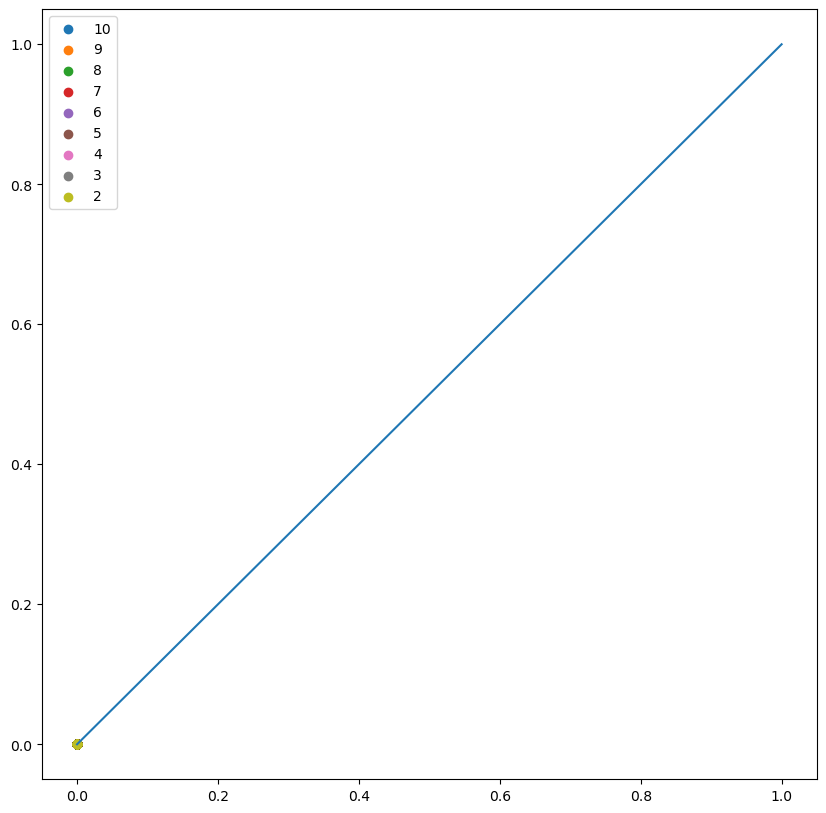

In [ ]:
N = 100
n = 100

S = 10

plt.figure(figsize=(10,10))

for s in range(S, 1, -1):

    self_dist = []
    min_dist = []

    for I in range(N):

        A = random_log_x(s,s)

        min_sim = 0
        for _ in range(n):
            B = random_log(s,s)
            sim = Levenshtein_min(A, B)
            if (sim < min_sim):
                min_sim = sim

        self_dist.append(Levenshtein_min(A, A))
        min_dist.append(min_sim)


    print(f'{s}/{S}')
    plt.scatter(self_dist, min_dist, label=str(s))

plt.plot(np.arange(0, 1.1, 0.1), [ x for x in np.arange(0, 1.1, 0.1) ])

plt.legend()
plt.show()

In [ ]:
def median(set, n):
    median = lv.setmedian(set)
    for i in range(n):
        median = lv.median_improve(median, set)
    return median

In [ ]:
def concatination(set):
    return "".join(set)

In [ ]:
levenshteinDistance("a","c")

1

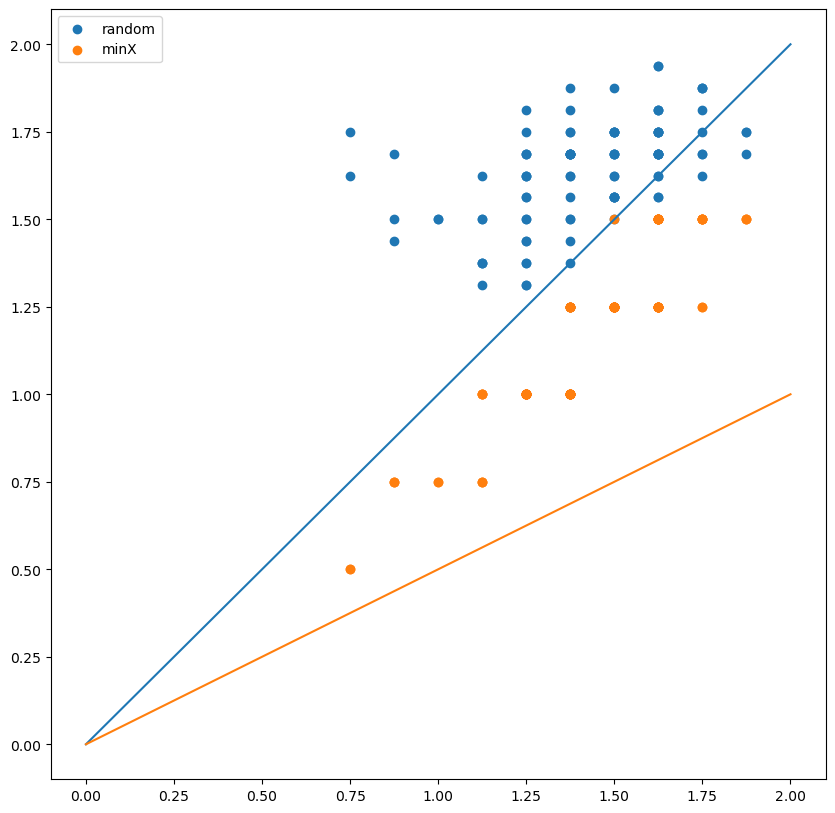

In [123]:
N = 100
n = 10

MAX_TRACE_LENGTH = 3
MAX_LOG_SIZE = 4

plt.figure(figsize=(10,10))

self_dists = []
min_dists = []
my_min_dists = []


for I in range(N):

    A = random_log_x(MAX_TRACE_LENGTH,MAX_LOG_SIZE)

    min_dist = 100
    min_B = collections.Counter([])

    for _ in range(n):
        B = random_log_x(MAX_TRACE_LENGTH,MAX_LOG_SIZE)
        dist = Levenshtein(A, B, log_len(A), log_len(B))
        if (dist < min_dist):
            min_dist = dist
            min_B = B

    self_dists.append(Levenshtein(A, A, log_len(A), log_len(A)))
    min_dists.append(min_dist)
    
    (my_min_dist, my_min_B) = minX(log_to_list(A))
    my_min_dists.append(my_min_dist)
   
    if (min_dist < my_min_dist):
        print(f"! minX violated !")

        print(f"A: {A}")
        print(f"min distance (random): {min_dist}")
        print(f"min distance (minX): {my_min_dist}")
        print(f"min B (random): {min_B}")
        print(f"min B (minX): {my_min_B}")
        
        break 

plt.scatter(self_dists, min_dists, label="random")
plt.scatter(self_dists, my_min_dists, label="minX")

plt.plot(np.arange(0, 2.1, 0.1), [ x for x in np.arange(0, 2.1, 0.1) ])
plt.plot(np.arange(0, 2.1, 0.1), [ x / 2 for x in np.arange(0, 2.1, 0.1) ])

plt.legend()
plt.show()

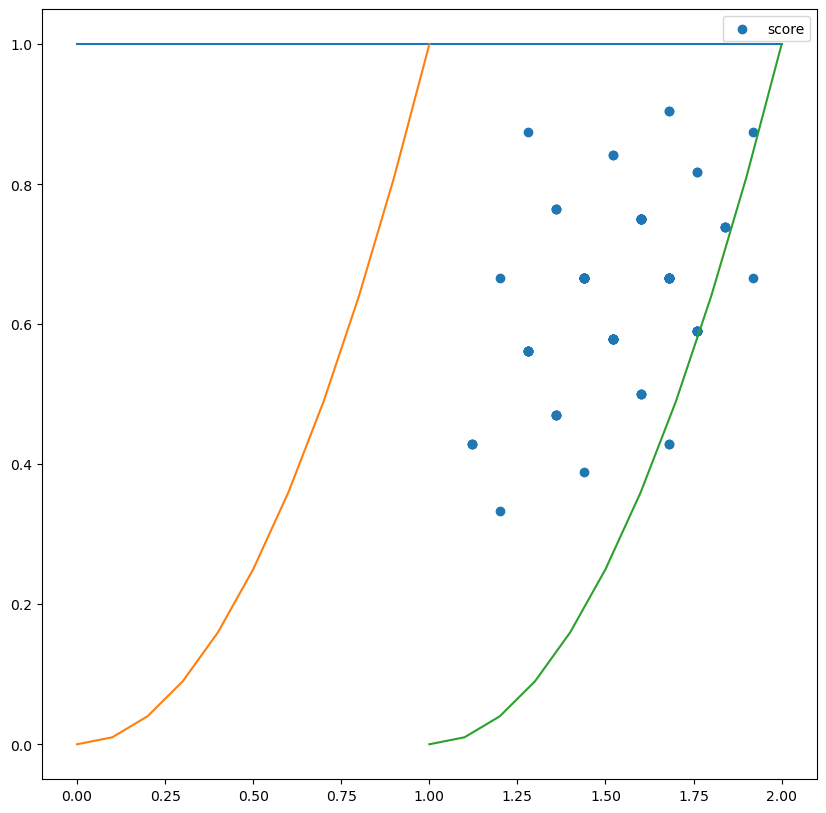

In [131]:
# since triangle inequation holds for levenshtein, any B that is closer to A than A itself, cannot be closer to A 
# then dist(A,A) / 2, because otherwise the triangle inequation would be hurt.

# dist(A,A) / 2 is a lower bound 
# 10 * dist(A,A)

N = 100

MAX_TRACE_LENGTH = 3
MAX_LOG_SIZE = 5

plt.figure(figsize=(10,10))

self_dists = []
min_dists = []

for I in range(N):

    A = random_log_x(MAX_TRACE_LENGTH,MAX_LOG_SIZE)

    self_dist = Levenshtein(A, A, log_len(A), log_len(A))

    lower_bound = self_dist / 2
    upper_bound = self_dist

    min_dist = 100
    min_B = collections.Counter([])

    (min_dist, my_min_B) = minX(log_to_list(A))
    min_dists.append((min_dist - lower_bound) / (upper_bound - lower_bound))
    # min_dists.append(min_dist - lower_bound)
    self_dists.append(self_dist)

plt.scatter(self_dists, min_dists, label="score")

plt.plot(np.arange(0, 2.1, 0.1), [ 1 for x in np.arange(0, 2.1, 0.1) ])
plt.plot(np.arange(0, 1.1, 0.1), [ x ** 2 for x in np.arange(0, 1.1, 0.1) ])
plt.plot(np.arange(1, 2.1, 0.1), [ x ** 2 for x in np.arange(0, 1.1, 0.1) ])

plt.legend()
plt.show()

In [71]:
def jitter(arr, r):
    return [ x + (np.random.random() - 0.5) * 2 * r for x in arr ]

print(jitter([0, 1], 1))

[0.407459521133245, 0.4032217400525422]


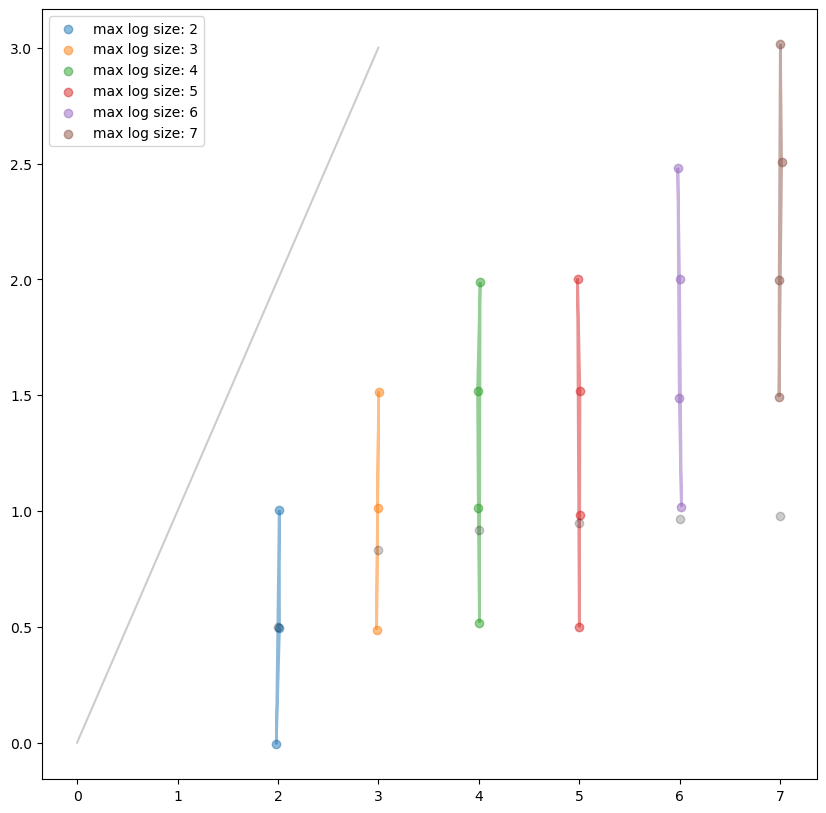

In [82]:
from matplotlib.patches import Polygon

N = 10

TRACE_LENGTH = 2
LOG_SIZE = 7

MIN_S = 2
MAX_S = LOG_SIZE

cmap = plt.get_cmap('tab10')
colors = cmap(np.arange(0, 1, 1 / 10))

plt.figure(figsize=(10,10))

for s in range(MIN_S, MAX_S + 1):

    xs = []
    ys = []

    for I in range(N):

        A = random_log_x(s, TRACE_LENGTH)

        # xs.append(Levenshtein(A, A, log_len(A), log_len(A)))
        # xs.append(log_len(A))
        xs.append(len(max(list(A), key = len)))
        
        (my_min_dist, my_min_B) = minX(log_to_list(A))
        ys.append(my_min_dist)

    xs, ys = zip(*list(set(zip(xs, ys))))

    xs = jitter(xs, 0.02)
    ys = jitter(ys, 0.02)

    if (len(xs) >= 3):

        hull = scipy.spatial.ConvexHull(list(zip(xs, ys)))
        poly = Polygon(hull.points[hull.vertices], alpha=0.5)
        poly.set_edgecolor(colors[s - MIN_S])
        poly.set_linewidth(2)
        poly.set_fill(False)
        plt.gca().add_patch(poly)

    plt.scatter(xs, ys, label=f'max log size: {s}', alpha=0.5)

plt.plot(np.arange(0, 3.1, 0.1), [ x for x in np.arange(0, 3.1, 0.1) ], color="black", alpha=0.2)
plt.scatter(range(MIN_S, MAX_S+1), [ 1 - 1 / (s*s - s) for s in range(MIN_S, MAX_S+1)], color="black", alpha=0.2)

plt.legend()
plt.show()

In [80]:
lv.hamming("ca","a")

2

<Axes: >

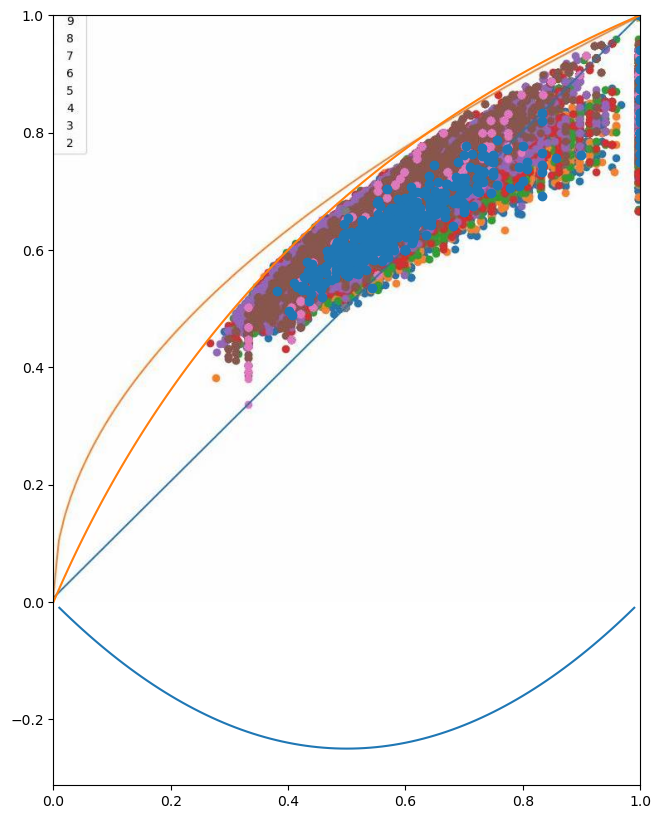

In [69]:
plt.figure(figsize=(10,10))

im = plt.imread("./table-test.jpg")
implot = plt.imshow(im, extent=[0, 1, 0, 1])

plt.scatter(self_sims, max_sims)
# plt.plot(np.arange(0, 1.1, 0.1), [ x for x in np.arange(0, 1.1, 0.1) ])
# plt.plot(np.arange(0.01, 1, 0.01), [ math.sqrt(x - 0.1) + 0.1 for x in np.arange(0.01, 1, 0.01) ])
plt.plot(np.arange(0.01, 1, 0.01), [ (x*x - x) for x in np.arange(0.01, 1, 0.01) ])

ax = plt.gca()

nodes = np.asfortranarray([
    [0.0, 0.3, 1.0],
    [0.0, 0.7, 1.0]
])

curve = bezier.Curve(nodes, degree=2)
curve.plot(100, ax=ax)

# for x in np.arange(0, 1, 0.1):
#     nodes = np.asfortranarray([
#         [0.0, 1-x, 1.0],
#         [0.0, x, 1.0]
#     ])

#     curve = bezier.Curve(nodes, degree=2)
#     curve.plot(100, ax=ax)

In [23]:
lv.ratio("c","a")

0.0

In [101]:
import pm4py
import pandas as pd


In [103]:
df_A = pd.DataFrame.from_records([
    {"case:concept:name": "0", "concept:name": "a", "time:timestamp": pd.to_datetime("2000-01-01"), "lifecycle:transition": "complete"},
    {"case:concept:name": "0", "concept:name": "b", "time:timestamp": pd.to_datetime("2000-01-02"), "lifecycle:transition": "complete"},
])

df_B = pd.DataFrame.from_records([
    {"case:concept:name": "1", "concept:name": "a", "time:timestamp": pd.to_datetime("2000-01-01"), "lifecycle:transition": "complete"},
    {"case:concept:name": "1", "concept:name": "b", "time:timestamp": pd.to_datetime("2000-01-02"), "lifecycle:transition": "complete"},
    {"case:concept:name": "1", "concept:name": "a", "time:timestamp": pd.to_datetime("2000-01-03"), "lifecycle:transition": "complete"},
])

df_C = pd.DataFrame.from_records([
    {"case:concept:name": "2", "concept:name": "b", "time:timestamp": pd.to_datetime("2000-01-01"), "lifecycle:transition": "complete"},
    {"case:concept:name": "2", "concept:name": "a", "time:timestamp": pd.to_datetime("2000-01-02"), "lifecycle:transition": "complete"},
])

In [109]:
pm4py.get_stochastic_language(df_C)

{('b', 'a'): 1.0}

In [110]:
S_A = {('a', 'b'): 1.0}
S_B = {('a', 'b', 'a'): 1.0}
S_C = {('b', 'a'): 1.0}

In [111]:
d_ab = pm4py.compute_emd(S_A, S_B)
d_bc = pm4py.compute_emd(S_B, S_C)
d_ac = pm4py.compute_emd(S_A, S_C)

print(d_ab, d_bc, d_ac)

0.3333333333333333 0.3333333333333333 1.0


/home/lennc/.local/lib/python3.11/site-packages/pm4py/algo/evaluation/earth_mover_distance/__init__.py:21: UserWarning: The earth_mover_distance package will be removed in a future release.
  warnings.warn("The earth_mover_distance package will be removed in a future release.")


In [114]:
A = collections.Counter(["b","c"])
B = collections.Counter(["a","b","c"])
C = collections.Counter(["a","b"])

print(Levenshtein(A, B, log_len(A), log_len(B)), Levenshtein(B, C, log_len(B), log_len(C)), Levenshtein(A, C, log_len(A), log_len(C)))

0.6666666666666666 0.6666666666666666 0.75
